## 라이브러리

In [84]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 처리
plt.rc("font", family = "Malgun Gothic")

# 기호 처리
plt.rcParams["axes.unicode_minus"] = False

## 데이터 불러오기

In [61]:
# 데이터 불러오기
fog_train = pd.read_csv("./data/fog_train.csv") # 3,156,459행
fog_test = pd.read_csv("./data/fog_test.csv") # 262,800행

# 첫 번째 열 삭제
df_train = fog_train.iloc[:, 1:].copy()
df_test = fog_test.copy()

# 컬럼 이름 통일
df_train.columns = [col.split('.')[-1] for col in df_train.columns]
df_test.columns = [col.split('.')[-1] for col in df_test.columns]

In [62]:
# 훈련 데이터 확인하기
df_train.head(3)

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4


In [63]:
# 테스트 데이터 확인하기
df_test.head(3)

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN


In [64]:
# 데이터 정보 확인하기
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156459 entries, 0 to 3156458
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 361.2+ MB


In [65]:
# 데이터 정보 확인하기
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      262800 non-null  object 
 1   month     262800 non-null  int64  
 2   day       262800 non-null  int64  
 3   time      262800 non-null  int64  
 4   minute    262800 non-null  int64  
 5   stn_id    262800 non-null  object 
 6   ws10_deg  262800 non-null  float64
 7   ws10_ms   262800 non-null  float64
 8   ta        262800 non-null  float64
 9   re        262800 non-null  float64
 10  hm        262800 non-null  float64
 11  sun10     262800 non-null  float64
 12  ts        262800 non-null  float64
 13  class     2694 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 28.1+ MB


In [66]:
# 기초통계데이터 확인
df_train.describe()

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
count,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
mean,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+01,3.600000e+02,2.250000e+01,3.780000e+01,1.000000e+00,1.000000e+02,2.687000e+01,7.010000e+01,6.052500e+04,4.000000e+00


## 데이터 탐색하기

### 결측치 확인

In [67]:
# 컬럼별 결측치 확인
df_train.isnull().sum()

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64

값이 비어있는 결측치는 없음. -99와 같은 결측치 존재

#### 종속변수 컬럼

In [68]:
# df_train
# class가 -99값을 가지는 결측치 (22,516개)
len(df_train[df_train['class'] == -99])

22516

In [69]:
# class가 -99값을 가지는 결측치 삭제
df_train = df_train[df_train['class'] != -99]

In [70]:
# df_test
# class 모두 NaN값으로 변경
df_test['class'] = np.nan

#### 독립변수 컬럼

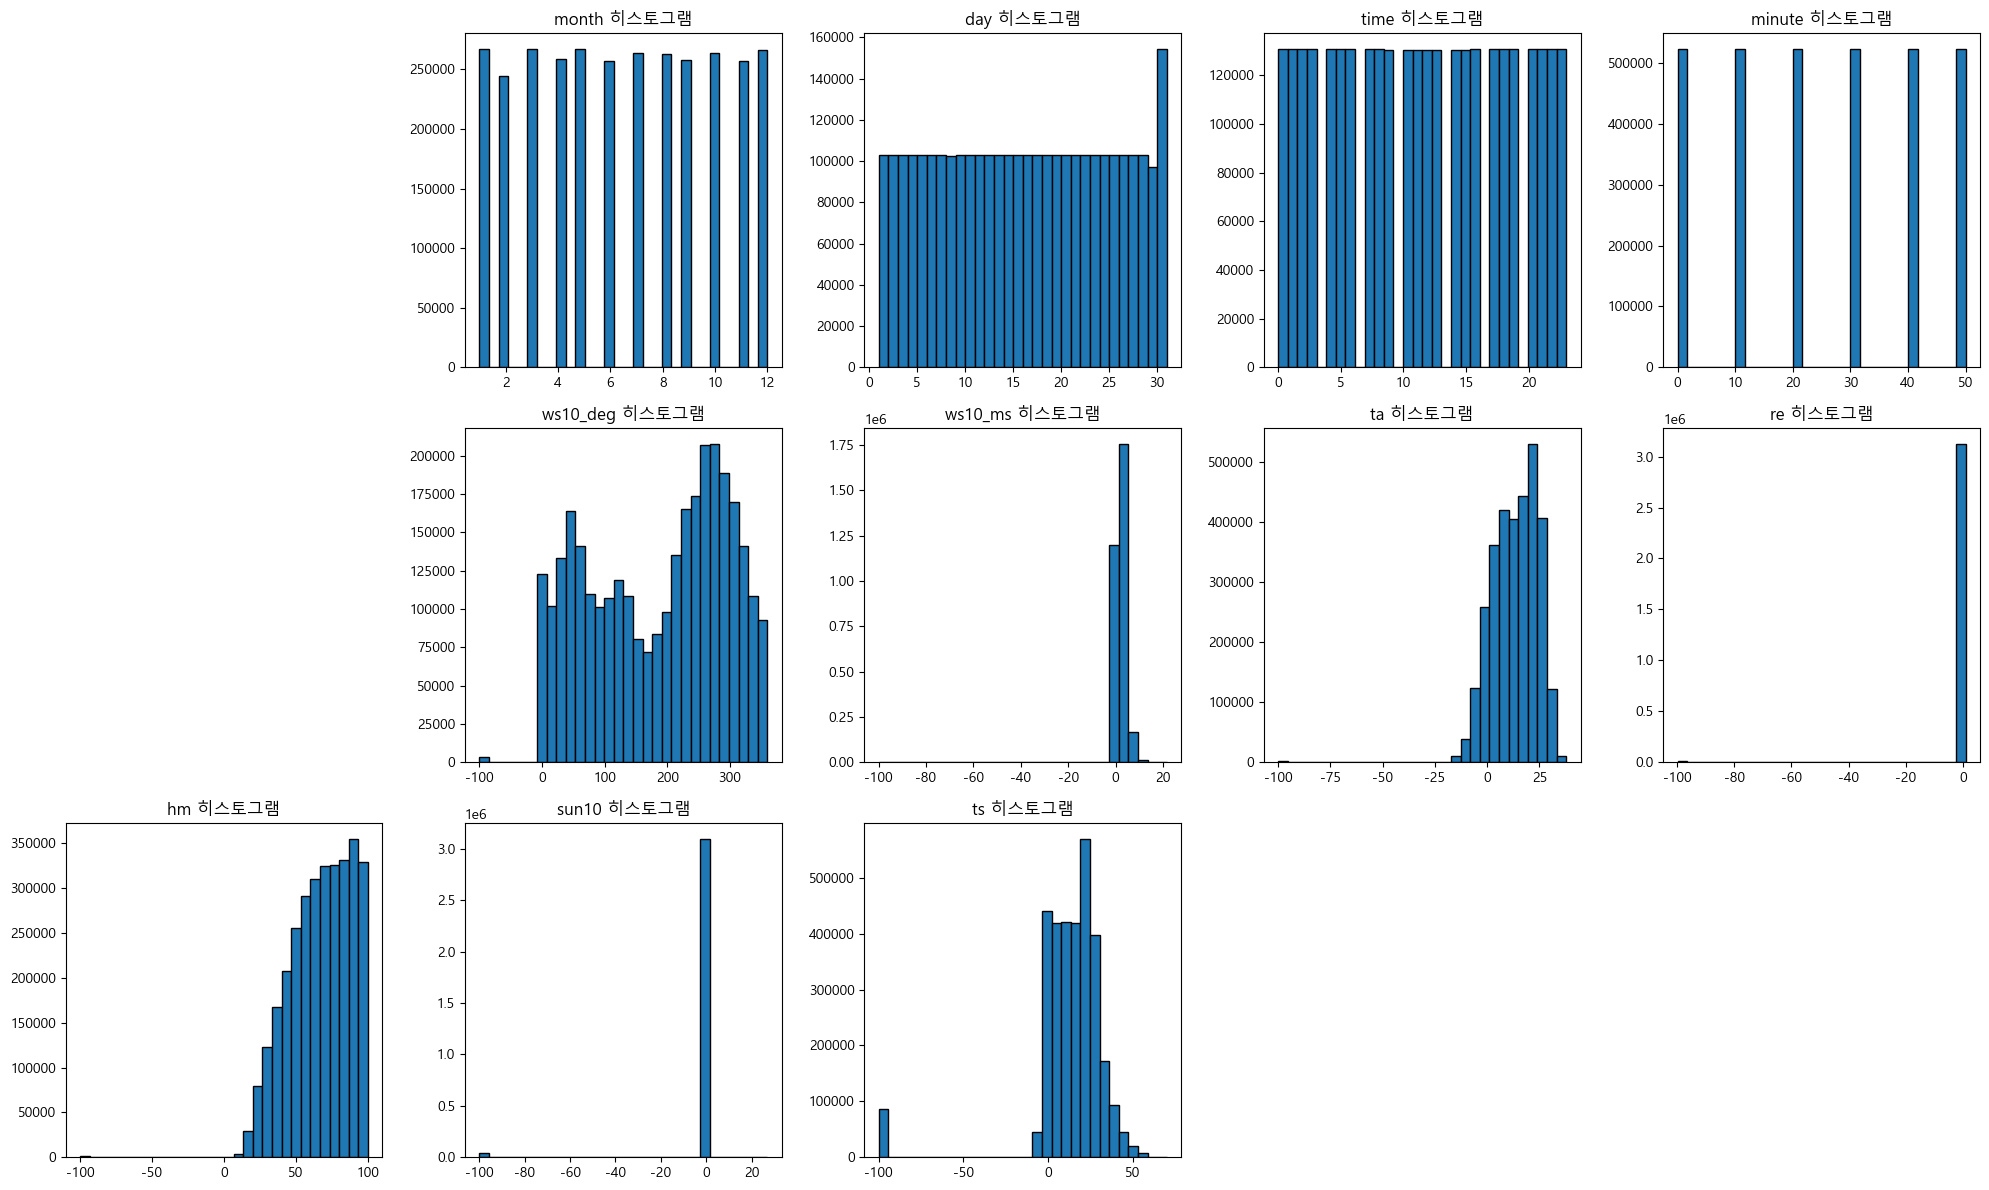

In [42]:
# 컬럼별 히스토그램 시각화
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# 컬럼 인덱스 초기화
col_index = 0
num_cols = 13

# 서브플롯에 히스토그램 그리기
for i in range(3):
    for j in range(5):
        if col_index < num_cols:
            col = df_train.columns[col_index]
            if df_train[col].dtype != 'object':  # object 타입 제외
                axes[i, j].hist(df_train[col], bins=30, edgecolor='k')  # 히스토그램 그리기
                axes[i, j].set_title('{} 히스토그램'.format(col))
            else:
                axes[i, j].axis('off')  # object 타입의 경우 빈 서브플롯
            col_index += 1
        else:
            axes[i, j].axis('off')  # 컬럼이 없는 경우 빈 서브플롯

# 전체 서브플롯 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig("./savefig/전체_히스토그램.png")
plt.show()

In [71]:
# df_train
# -99.9값(결측치)을 가지는 컬럼 확인
for col in df_train.columns :
    print(col, len(df_train[df_train[col] == -99.9]))

year 0
month 0
day 0
time 0
minute 0
stn_id 0
ws10_deg 3435
ws10_ms 3372
ta 1408
re 12764
hm 1216
sun10 41712
ts 86045
vis1 0
class 0


In [72]:
# df_train
# 지역별로 구분하기 위한 딕셔너리 생성
df_train_stn = {}

# 종류별로 데이터프레임 분할하여 딕셔너리에 저장
for stn_id in df_train['stn_id'].unique():
    df_train_stn[f'df_train_{stn_id}'] = df_train[df_train['stn_id'] == stn_id].copy()

# 결과 확인 및 데이터프레임 변수에 담기
for name, df in df_train_stn.items():
    locals()[name] = df

# 선형보간법 적용할 컬럼
columns_to_interpolate = ['ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts']

for key, df in df_train_stn.items():
    df.replace(-99.9, np.nan, inplace=True)
    for column in columns_to_interpolate:
        # 선형 보간법을 사용하여 결측치 채우기
        df[column].interpolate(method='linear', inplace=True)
        # 선형 보간 후 남아 있는 결측치를 앞 채우기와 뒤 채우기 사용
        df[column].ffill(inplace=True)
        df[column].bfill(inplace=True)

# 데이터프레임 하나로 합치기
df_train_dfs = []

for key, df in df_train_stn.items():
    df_train_dfs.append(df)
    
combined_df = pd.concat(df_train_dfs, ignore_index=True)

# df_train에 저장
df_train = combined_df.copy()

# 결측치 확인
df_train.isnull().sum()

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64

In [73]:
# df_test
# 지역별로 구분하기 위한 딕셔너리 생성
df_test_stn = {}

# 종류별로 데이터프레임 분할하여 딕셔너리에 저장
for stn_id in df_test['stn_id'].unique():
    df_test_stn[f'df_test_{stn_id}'] = df_test[df_test['stn_id'] == stn_id].copy()

# 결과 확인 및 데이터프레임 변수에 담기
for name, df in df_test_stn.items():
    locals()[name] = df

# 선형보간법 적용할 컬럼
columns_to_interpolate = ['ws10_deg', 'ws10_ms', 'ta', 'ts', 're', 'hm', 'sun10']

for key, df in df_test_stn.items():
    df.replace(-99.9, np.nan, inplace=True)
    for column in columns_to_interpolate:
        # 선형 보간법을 사용하여 결측치 채우기
        df[column].interpolate(method='linear', inplace=True)
        # 선형 보간 후 남아 있는 결측치를 앞 채우기와 뒤 채우기 사용
        df[column].ffill(inplace=True)
        df[column].bfill(inplace=True)

# 데이터프레임 하나로 합치기
df_test_dfs = []

# 데이터프레임을 하나의 데이터프레임으로 합치기
for key, df in df_test_stn.items():
    df_test_dfs.append(df)
    
combined_df = pd.concat(df_test_dfs, ignore_index=True)

# df_test 저장
df_test = combined_df.copy()

# 결측치 확인
df_test.isnull().sum()

year             0
month            0
day              0
time             0
minute           0
stn_id           0
ws10_deg         0
ws10_ms          0
ta               0
re               0
hm               0
sun10            0
ts               0
class       262800
dtype: int64

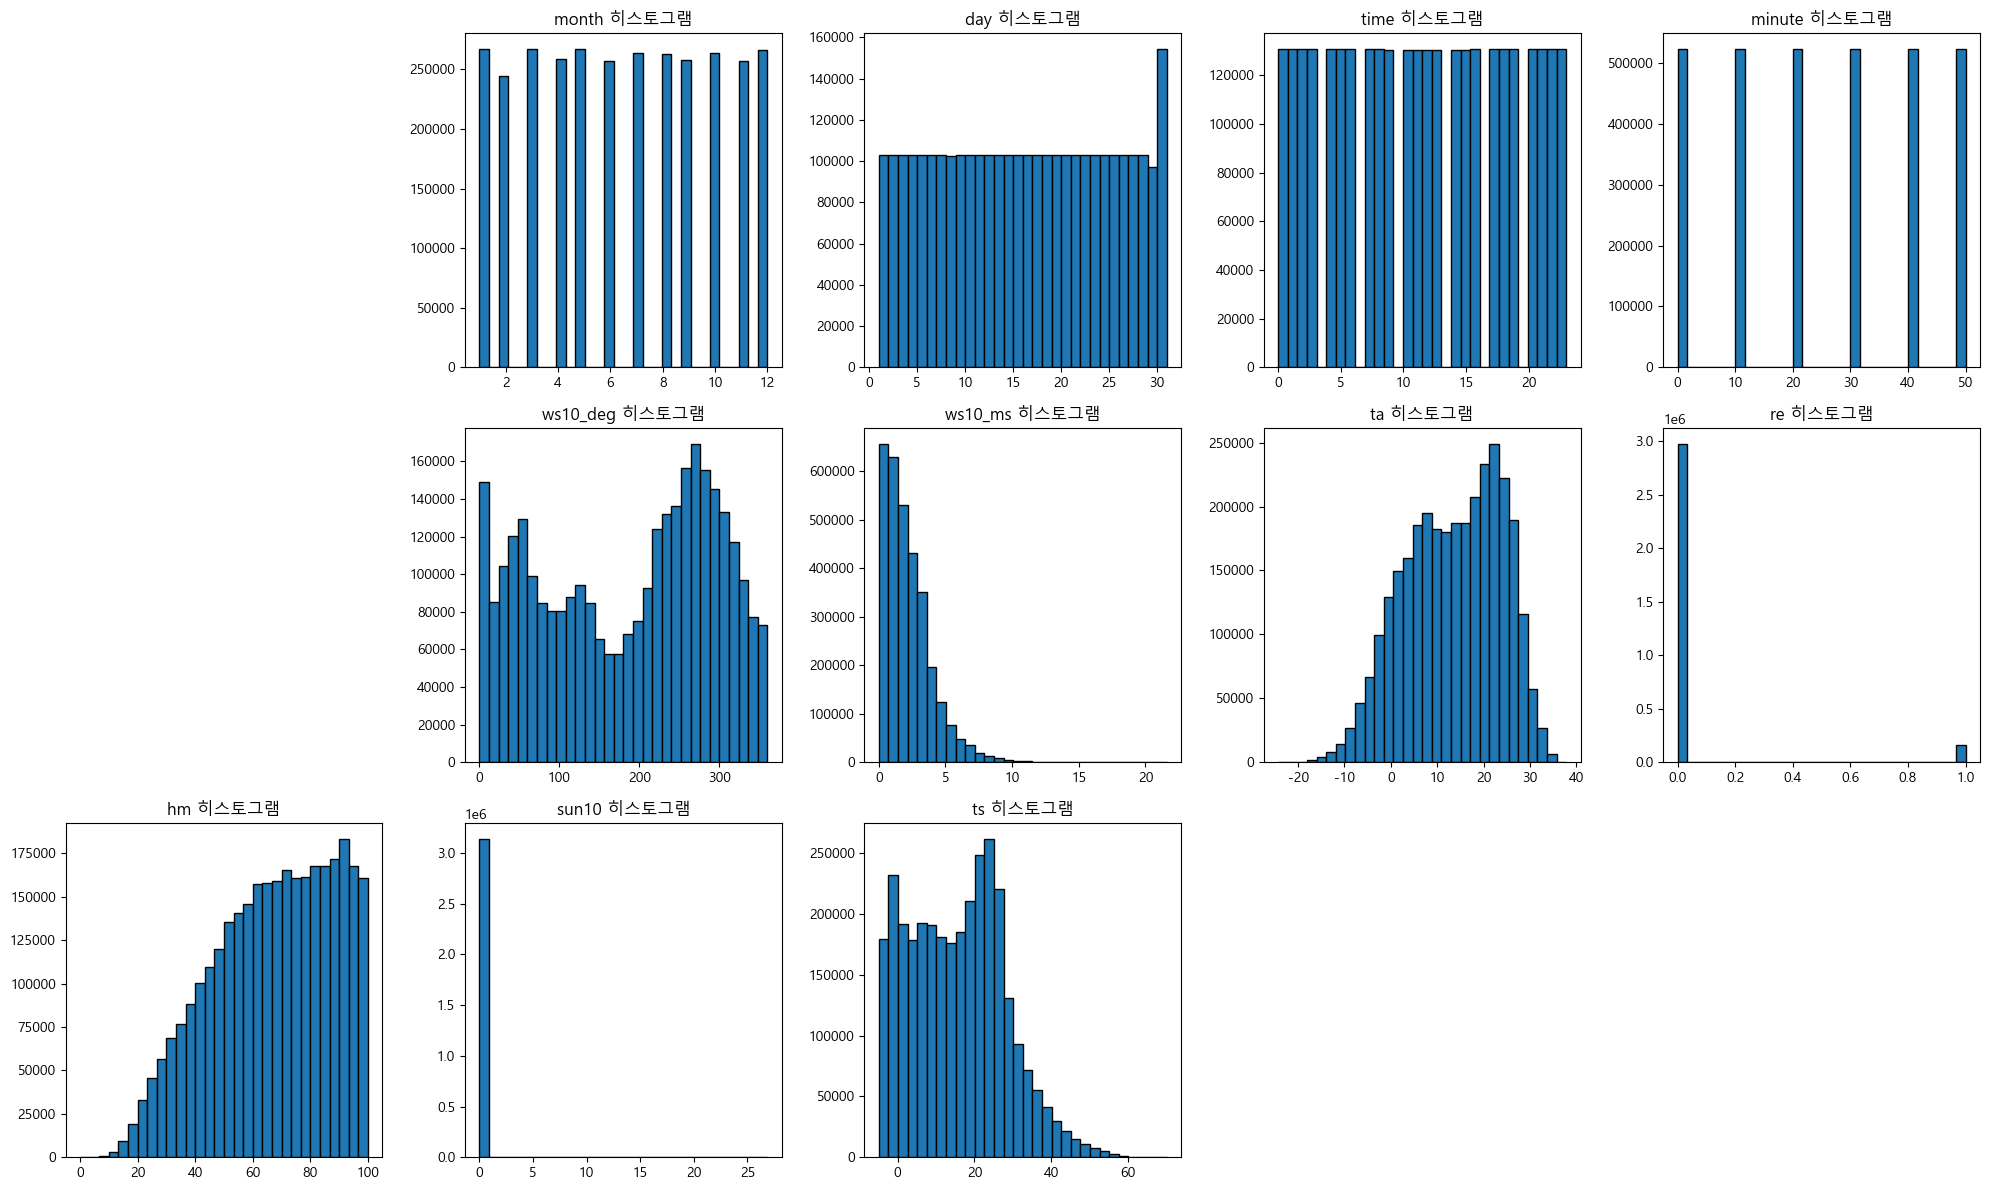

In [75]:
# 결측치 보간 후 컬럼별 히스토그램 시각화
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# 컬럼 인덱스 초기화
col_index = 0
num_cols = 13

# 서브플롯에 히스토그램 그리기
for i in range(3):
    for j in range(5):
        if col_index < num_cols:
            col = df_train.columns[col_index]
            if df_train[col].dtype != 'object':  # object 타입 제외
                axes[i, j].hist(df_train[col], bins=30, edgecolor='k')  # 히스토그램 그리기
                axes[i, j].set_title('{} 히스토그램'.format(col))
            else:
                axes[i, j].axis('off')  # object 타입의 경우 빈 서브플롯
            col_index += 1
        else:
            axes[i, j].axis('off')  # 컬럼이 없는 경우 빈 서브플롯

# 전체 서브플롯 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig("./savefig/전체_히스토그램_결측치_보간후.png")
plt.show()

### 중복 데이터 확인하기

In [80]:
# train 중복값 확인하기
df_train[df_train.duplicated(keep=False)]

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class


In [81]:
# test 중복값 확인하기
df_test[df_test.duplicated(keep=False)]

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class


중복 데이터 없음

### 이상치 확인하기

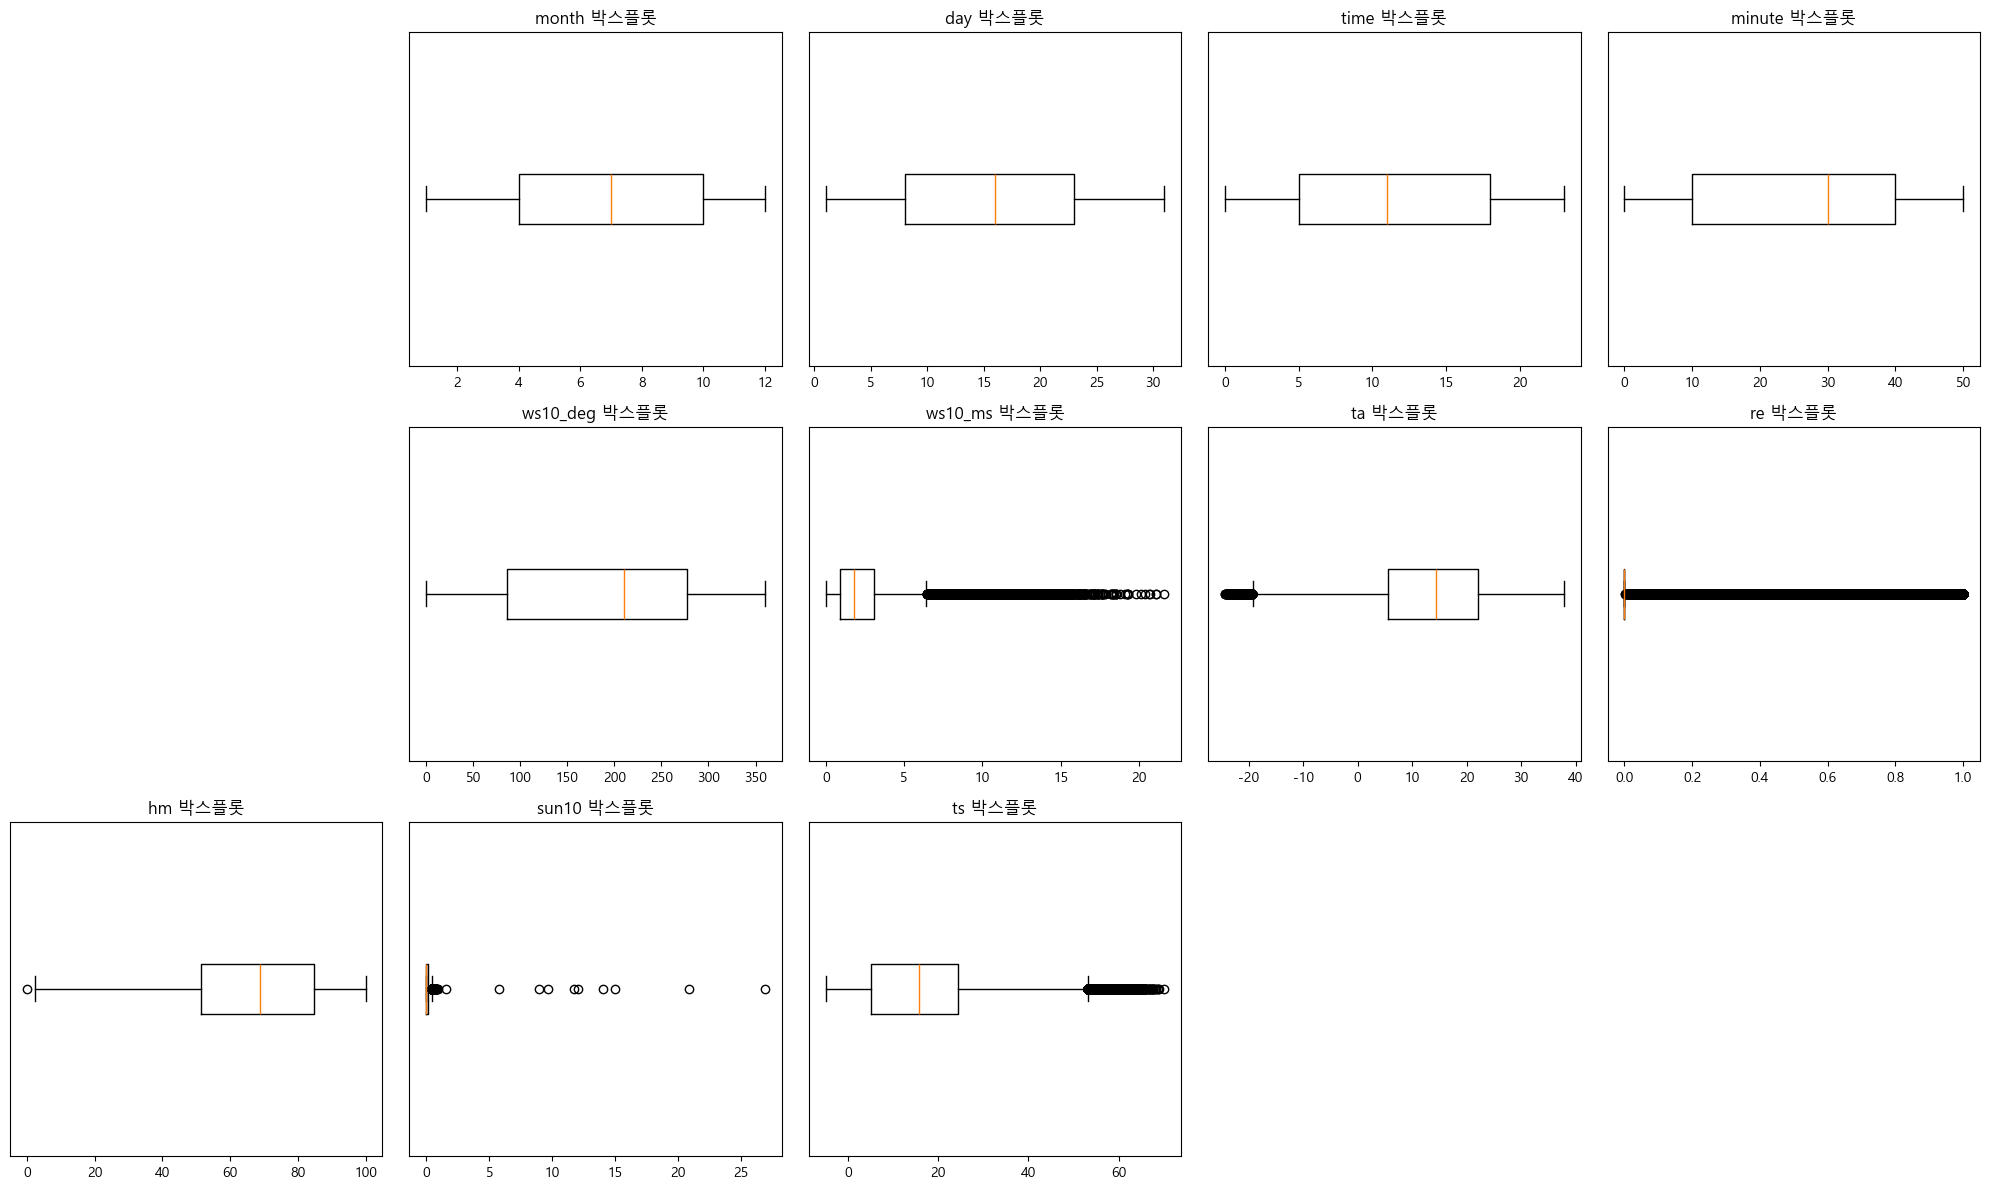

In [77]:
# 서브플롯 그리드 생성
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# 컬럼 인덱스 초기화
col_index = 0
num_cols = 13  # 컬럼이 13개임을 명시

# 서브플롯에 상자그림 그리기
for i in range(3):
    for j in range(5):
        if col_index < num_cols:
            col = df_train.columns[col_index]
            if df_train[col].dtype != 'object':  # object 타입 제외
                axes[i, j].boxplot(df_train[col], vert=False)
                axes[i, j].set_yticks([])
                axes[i, j].set_title('{} 박스플롯'.format(col))
            else:
                axes[i, j].axis('off')  # object 타입의 경우 빈 서브플롯
            col_index += 1
        else:
            axes[i, j].axis('off')  # 컬럼이 없는 경우 빈 서브플롯

# 전체 서브플롯 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig("./savefig/전체_박스플롯_결측치_보간후.png")
plt.show()

값을 확인해본 결과 데이터 수가 적지만 발생할 수 있는 기상 현상이라고 판단하여 추가적인 이상치 처리는 하지 않음

### 상관관계 확인

In [78]:
# 문자열 데이터를 포함한 열을 제거
numeric_df_train = df_train.select_dtypes(include=[np.number])

# 상관관계 데이터프레임 생성
corr_df = numeric_df_train.corr()
corr_df

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
month,1.000000,0.010256,-0.000283,0.000010,-0.043638,-0.065023,0.203543,-0.007144,0.159468,-0.046748,0.159728,0.098646,-0.014579
day,0.010256,1.000000,0.000149,-0.000036,-0.017499,-0.010038,0.011840,-0.014944,0.017565,0.000116,0.012859,0.005905,-0.009518
time,-0.000283,0.000149,1.000000,-0.000052,0.081066,0.121038,0.131428,-0.007302,-0.234145,0.062941,0.123791,0.100608,0.050587
minute,0.000010,-0.000036,-0.000052,1.000000,-0.000284,0.000066,-0.000042,0.000639,0.000074,-0.000074,-0.000108,-0.000227,-0.000118
ws10_deg,-0.043638,-0.017499,0.081066,-0.000284,1.000000,0.206869,-0.078499,-0.048634,-0.229277,0.079002,-0.055370,0.036056,0.022507
ws10_ms,-0.065023,-0.010038,0.121038,0.000066,0.206869,1.000000,0.007340,0.008911,-0.294337,0.212700,0.067041,0.144451,0.046138
ta,0.203543,0.011840,0.131428,-0.000042,-0.078499,0.007340,1.000000,0.057628,0.152937,0.285718,0.919063,0.059569,0.024945
re,-0.007144,-0.014944,-0.007302,0.000639,-0.048634,0.008911,0.057628,1.000000,0.263807,-0.119514,0.025792,-0.196089,-0.041641
hm,0.159468,0.017565,-0.234145,0.000074,-0.229277,-0.294337,0.152937,0.263807,1.000000,-0.414051,0.025354,-0.346778,-0.120086
sun10,-0.046748,0.000116,0.062941,-0.000074,0.079002,0.212700,0.285718,-0.119514,-0.414051,1.000000,0.551321,0.152670,0.049583


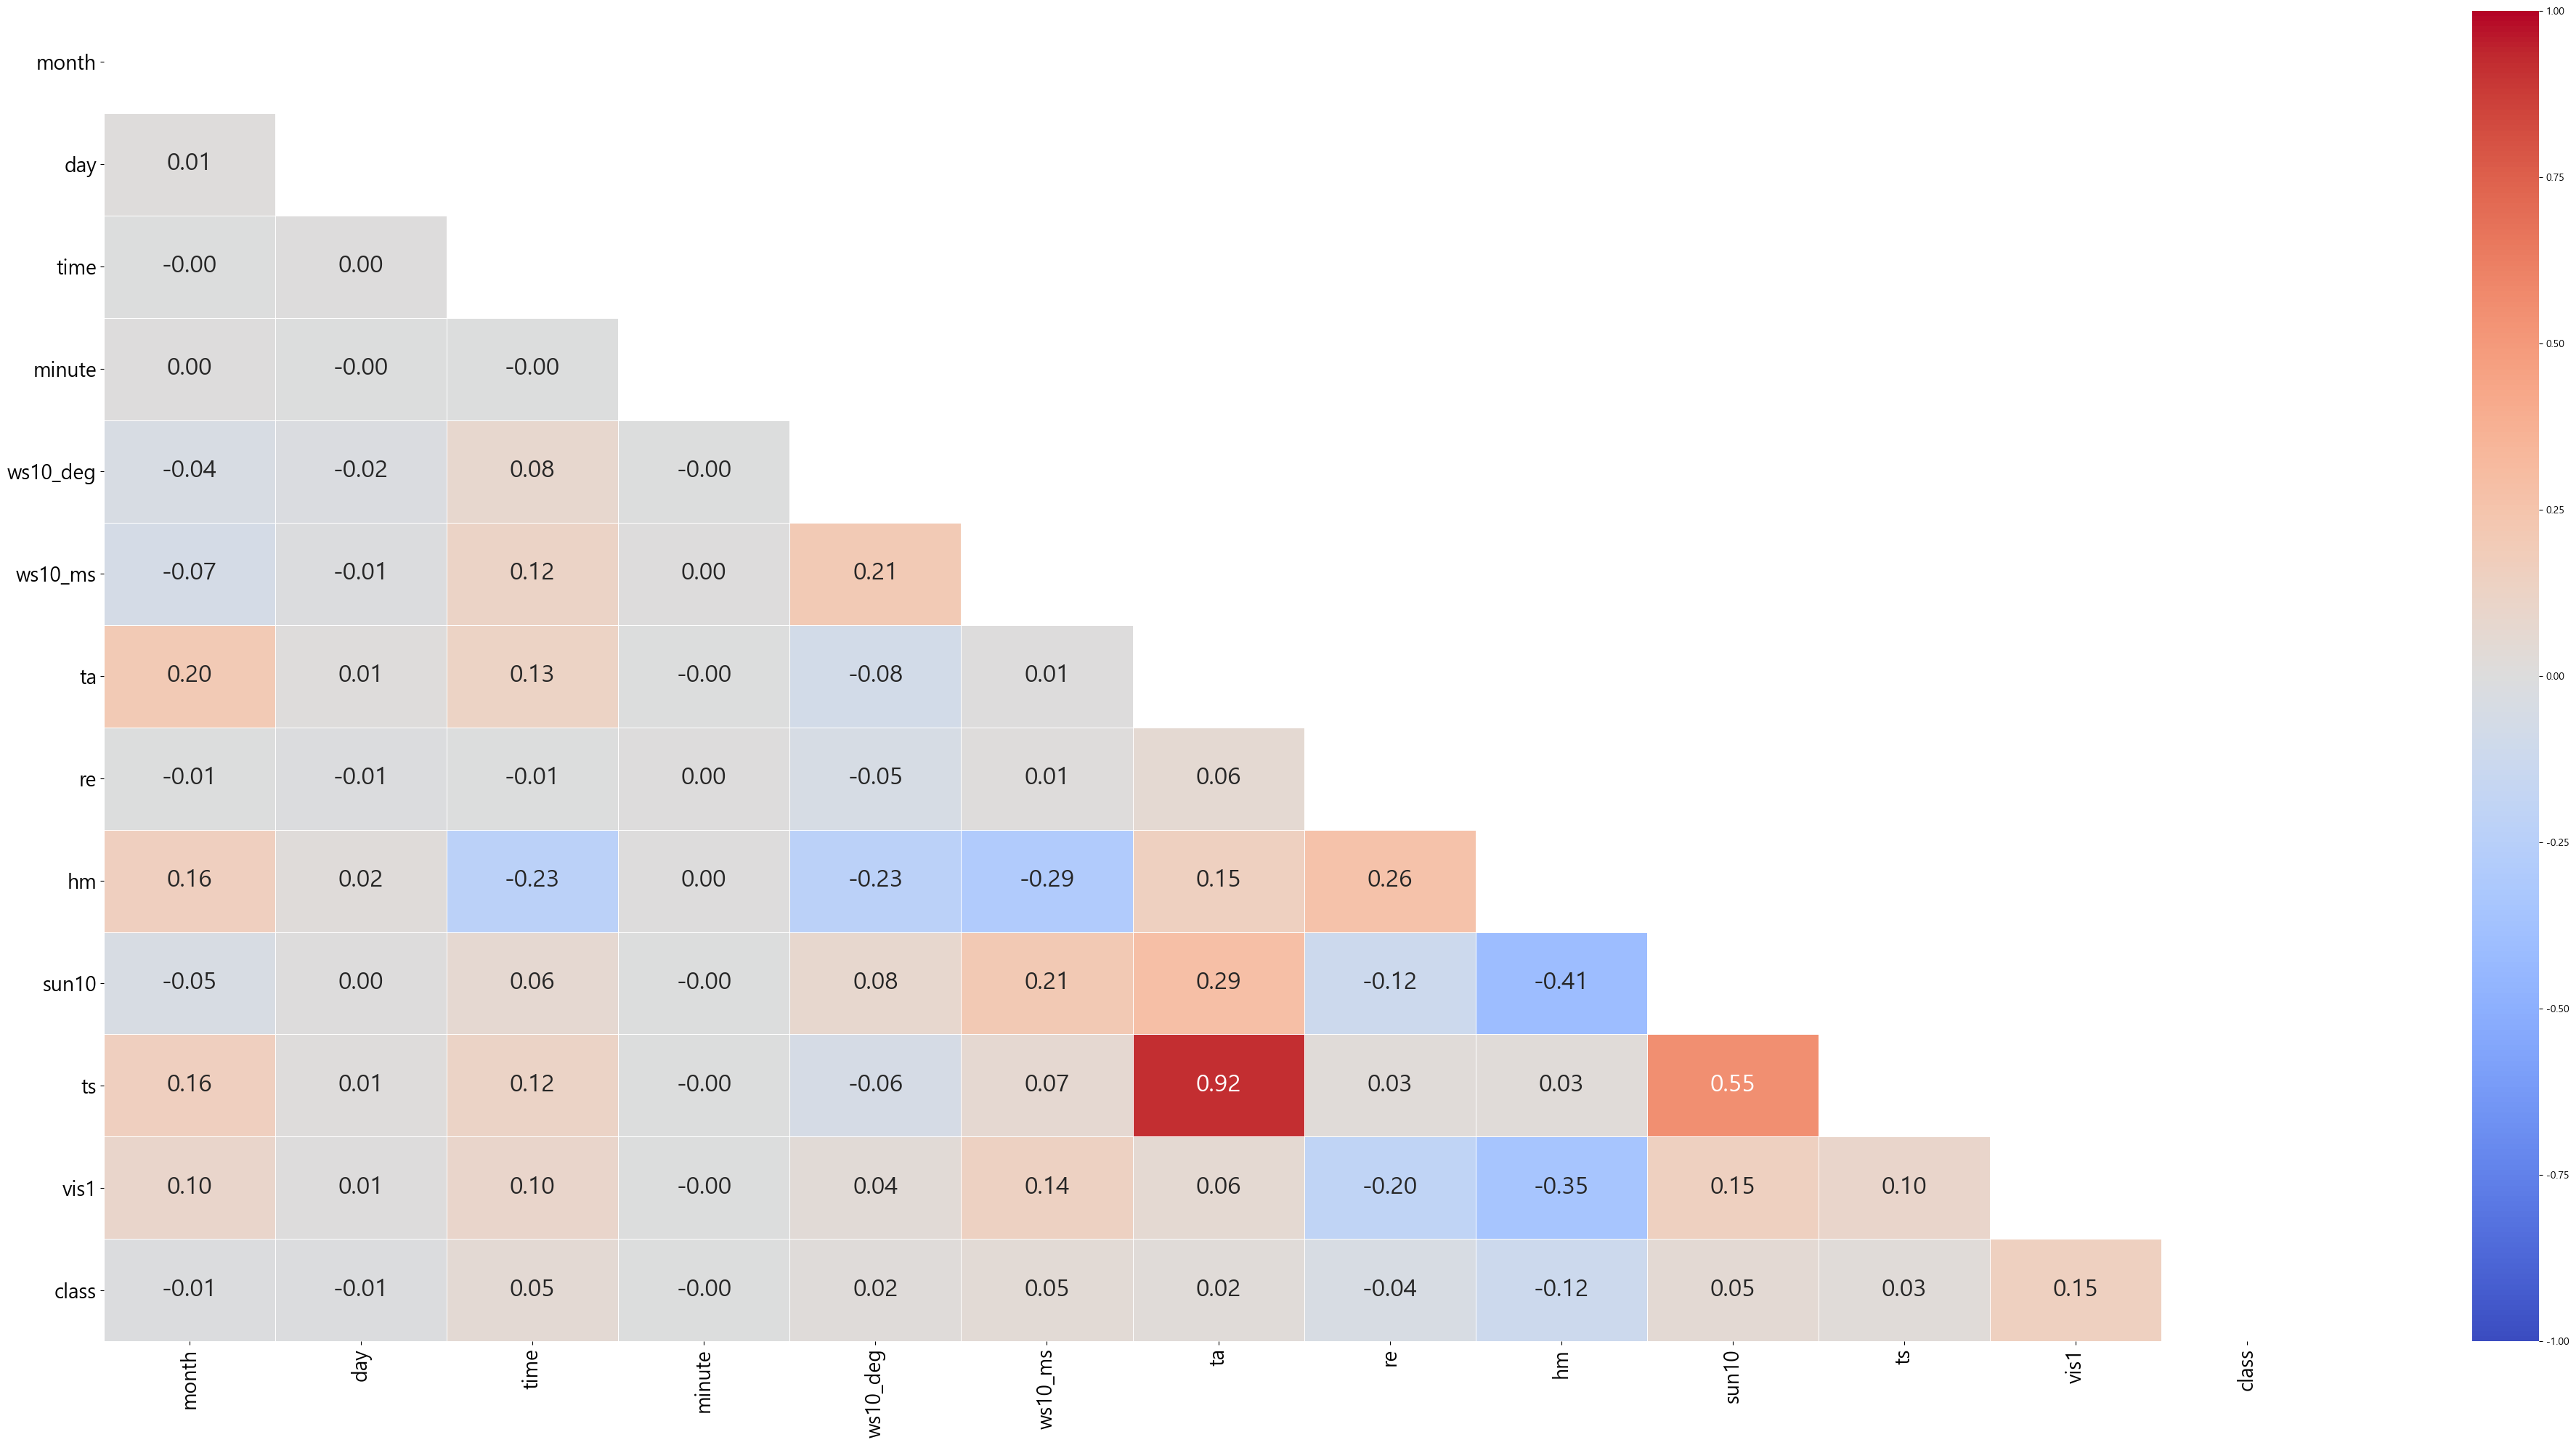

In [79]:
# 히트맵으로 상관관계 확인
fig = plt.figure(figsize=(40,20))
target_cor = corr_df

mask = np.triu(np.ones_like(target_cor))
sns.heatmap(target_cor, mask=mask, vmin=-1, vmax=1, cmap ='coolwarm', linewidths=.5,
            annot=True, fmt=".2f", xticklabels=False, yticklabels=False, annot_kws={"size": 24})
plt.xticks(np.arange(0.5, len(target_cor.columns)+0.5, 1), target_cor.columns, size=20, rotation=90)
plt.yticks(np.arange(0.5, len(target_cor.index)+0.5, 1), target_cor.index, size=20)
plt.tight_layout()
plt.savefig('./savefig/상관관계_그래프.png')

기온(ta)과 지면온도(ts) 사이에 높은 상관관계가 확인됨<br>
분류 분석을 진행할 예정이므로, 이 변수들은 일단 제거하지 않기로 함